# Virtual4C

In [151]:
!wget https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM4417610&format=file&file=GSM4417610%5FGranta%5Fb38d5%2Emcool
!cooler ls ./GSM4417610_Granta_b38d5.mcool

./GSM4417610_Granta_b38d5.mcool::/resolutions/10000
./GSM4417610_Granta_b38d5.mcool::/resolutions/20000
./GSM4417610_Granta_b38d5.mcool::/resolutions/40000
./GSM4417610_Granta_b38d5.mcool::/resolutions/80000
./GSM4417610_Granta_b38d5.mcool::/resolutions/160000
./GSM4417610_Granta_b38d5.mcool::/resolutions/320000
./GSM4417610_Granta_b38d5.mcool::/resolutions/640000
./GSM4417610_Granta_b38d5.mcool::/resolutions/1280000
./GSM4417610_Granta_b38d5.mcool::/resolutions/2560000
./GSM4417610_Granta_b38d5.mcool::/resolutions/5120000
./GSM4417610_Granta_b38d5.mcool::/resolutions/10240000


In [11]:
!wget https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM4604287&format=file&file=GSM4604287%5F1360%2Eiced%2Emcool
!cooler ls ./GSM4604287_1360.iced.mcool 

./GSM4604287_1360.iced.mcool::/resolutions/10000
./GSM4604287_1360.iced.mcool::/resolutions/20000
./GSM4604287_1360.iced.mcool::/resolutions/40000
./GSM4604287_1360.iced.mcool::/resolutions/100000
./GSM4604287_1360.iced.mcool::/resolutions/250000
./GSM4604287_1360.iced.mcool::/resolutions/500000
./GSM4604287_1360.iced.mcool::/resolutions/1000000


In [21]:
import sys
sys.path.append('/Users/yuanzan/Documents/github/seqyuan/trackc/src')
import trackc as tc
import cooler
import pandas as pd

In [13]:
cooler.fileops.list_coolers('GSM4604287_1360.iced.mcool')

['/resolutions/10000',
 '/resolutions/20000',
 '/resolutions/40000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000',
 '/resolutions/1000000']

In [130]:
#AML_1360 = cooler.Cooler('/Users/yuanzan/Documents/trackc_datata/GSM4604277_773.iced.mcool::/resolutions/20000')
AML_1360 = cooler.Cooler('/Users/yuanzan/Documents/trackc_datata/GSM4604287_1360.iced.mcool::/resolutions/10000')

gene_bed12 = pd.read_table('./Homo_sapiens.GRCh38.105.chr.bed13', header=None)
gene_bed12 = gene_bed12[gene_bed12[12]=="protein_coding"]
gene_bed12[0] = 'chr' + gene_bed12[0]

In [71]:
AML_1360.chromsizes.head(3)

name
chr1    248956422
chr2    242193529
chr3    198295559
Name: length, dtype: int32

In [76]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

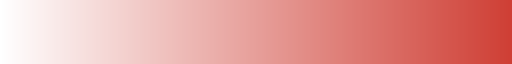

In [146]:
cmap4 = LinearSegmentedColormap.from_list('custom1', 
                                             [(0, 'white'),
                                              #(0.1, 'w'),
                                              (0.2, 'r'),
                                              (0.8, '#CF3F35'),
                                              (1, '#CF3F35')], N=100)

#tc.pa.colorC(cname=cmap4)
cmap4
import seaborn as sns
cmap5 = sns.blend_palette(['white', '#CF3F35'], as_cmap=True)
cmap5

no max min range
maxrange: 1213.0 minrange: 1.0


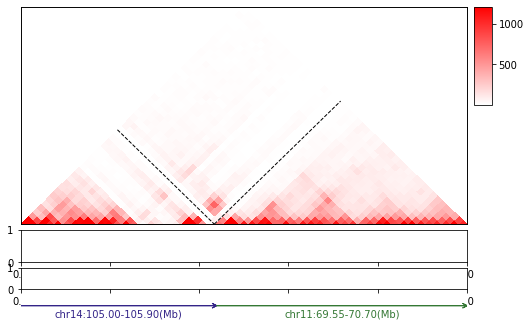

In [174]:
AML_270 = cooler.Cooler('/Users/yuanzan/Documents/trackc_datata/GSM4417610_Granta_b38d5.mcool::/resolutions/40000')
#regions = ['chr14:104500000-106100000', 'chr11:69550000-71000000']
regions = ['chr14:105000000-105900000', 'chr11:69550000-70700000']
target_TSS = 'chr8:127735434-127735435'

aml = tc.tl.extractContactRegions(clr=AML_270, row_regions=regions)

ten = tc.tenon(width=8, height=1)
ten.add(pos='bottom', height=4)
ten.add(pos='bottom', height=0.6, hspace=0.1)
ten.add(pos='bottom', height=0.4, hspace=0.1)
ten.add(pos='bottom', height=0.4, hspace=0.1)

tc.pl.mapC(ax=ten.axs(0), mat=aml.cmat, 
           logdata=False, map_type='triangle', symmetric=False)

tc.pl.mapc_markline(ax=ten.axs(0), row_regions=aml.row_regions, map_type='triangle',
                    binsize=40000, map_order=0, symmetric=False, show_regions_edge=True)


#tc.pl.gene_track(ax=ten.axs(2), bed12=gene_bed12, regions=regions, line=3, gene_fontszie=10)
tc.pl.multi_scale_track(ten.axs(3), regions=regions, scale_adjust='Mb', intervals=1, tick_rotation=0, tick_fontsize=10)



maxrange: 200 minrange: 1.0


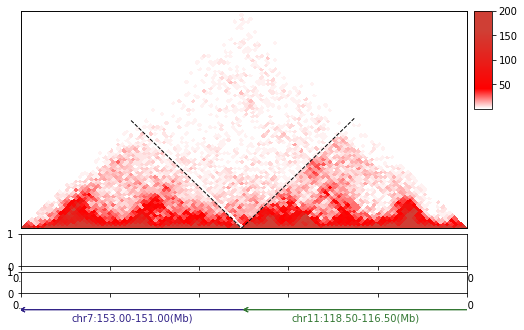

In [149]:
AML_270 = cooler.Cooler('/Users/yuanzan/Documents/trackc_datata/GSM4604275_270.iced.mcool::/resolutions/40000')
regions = ['chr7:153000000-151000000', 'chr11:118500000-116500000']
target_TSS = 'chr8:127735434-127735435'

aml = tc.tl.extractContactRegions(clr=AML_270, row_regions=regions)

ten = tc.tenon(width=8, height=1)
ten.add(pos='bottom', height=4)
ten.add(pos='bottom', height=0.6, hspace=0.1)
ten.add(pos='bottom', height=0.4, hspace=0.1)
ten.add(pos='bottom', height=0.4, hspace=0.1)

tc.pl.mapC(ax=ten.axs(0), mat=aml.cmat, cmap=cmap4, maxrange=200,
           logdata=False, map_type='triangle', symmetric=False)

tc.pl.mapc_markline(ax=ten.axs(0), row_regions=aml.row_regions, map_type='triangle',
                    binsize=40000, map_order=0, symmetric=False, show_regions_edge=True)


#tc.pl.gene_track(ax=ten.axs(2), bed12=gene_bed12, regions=regions, line=3, gene_fontszie=10)
tc.pl.multi_scale_track(ten.axs(3), regions=regions, scale_adjust='Mb', intervals=1, tick_rotation=0, tick_fontsize=10)



In [178]:
import pyBigWig
AML_1360_H3K27ac = pyBigWig.open('/Users/yuanzan/Documents/github/seqyuan/trackc_data/GSE152136_RAW/GSM4604189_1360_CUT_TAG_H3K27ac.MACS2.nodup_x_ctl.pval.signal.bigwig')

maxrange: 15 minrange: 0
no max min range
maxrange: 27.0 minrange: 1.0


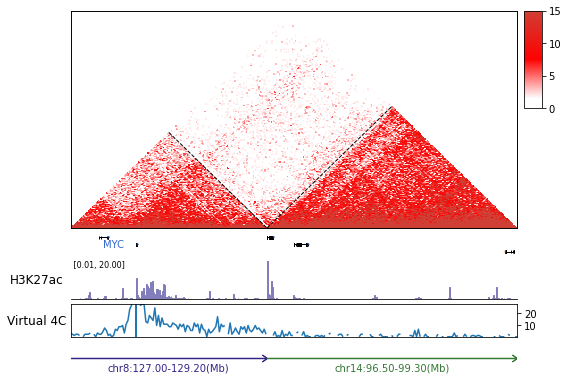

In [210]:
cmap4 = LinearSegmentedColormap.from_list('custom1', 
                                             [(0, 'white'),
                                              #(0.1, 'w'),
                                              (0.1, 'w'),
                                              (0.5, 'r'),
                                              #(0.7, '#CF3F35'),
                                              (1, '#CF3F35')], N=100)

regions = ['chr8:127000000-129200000', 'chr14:96500000-99300000']
MYC_TSS = 'chr8:127735434-127735435'
#regions = ['chr7:116400000-117400000', 'chr7:148900000-149900000']
#MYC_TSS = 'chr8:127735434-127735435'
AML_1360 = cooler.Cooler('/Users/yuanzan/Documents/trackc_datata/GSM4604287_1360.iced.mcool::/resolutions/20000')


aml = tc.tl.extractContactRegions(clr=AML_1360, row_regions=regions)


ten = tc.tenon(width=8, height=1)
ten.add(pos='bottom', height=4)

ten.add(pos='bottom', height=0.4, hspace=0.1)
ten.add(pos='bottom', height=0.7, hspace=0.1)
ten.add(pos='bottom', height=0.6, hspace=0.1)
ten.add(pos='bottom', height=0.6, hspace=0.1)


tc.pl.mapC(ax=ten.axs(0), mat=aml.cmat, maxrange=15,minrange=0, cmap=cmap4,
           logdata=False, map_type='triangle', symmetric=False)
tc.pl.mapc_markline(ax=ten.axs(0), row_regions=aml.row_regions, map_type='triangle',
                    binsize=20000, map_order=0, symmetric=False, show_regions_edge=True)

tc.pl.gene_track(ax=ten.axs(1), bed12=gene_bed12, regions=regions, line=3, gene_fontszie=10, show_label=['MYC'])
tc.pl.bw_track(AML_1360_H3K27ac, ten.axs(2), regions=regions, ymax=20, label='H3K27ac', binsize=10000, invert_y=False)

tc.pl.virtual4C(ax=ten.axs(3), clr=AML_1360, target=MYC_TSS, contact_regions=regions, 
                track_type='line', label='Virtual 4C')


tc.pl.multi_scale_track(ten.axs(4), regions=regions, scale_adjust='Mb', intervals=1, tick_rotation=0, tick_fontsize=10)



In [63]:
aml.row_regions

,chrom,start,end,isReverse,fetch_start,fetch_end,region4coolFetch,cbins
chr7:116400000-117400000,chr7,116400000,117400000,False,116400000,117400000,chr7:116400000-117400000,100
chr7:148900000-149900000,chr7,148900000,149900000,False,148900000,149900000,chr7:148900000-149900000,100


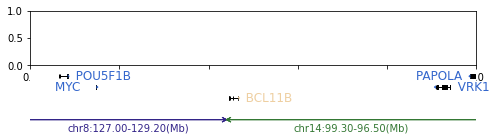

In [32]:
regions = ['chr8:127000000-129200000', 'chr14:99300000-96500000']
MYC_TSS = 'chr8:127735434-127735435'

ten = tc.tenon(width=8, height=1)
ten.add(pos='bottom', height=1)
ten.add(pos='bottom', height=0.6, hspace=0.1)
ten.add(pos='bottom', height=0.4, hspace=0.1)


tc.pl.gene_track(ax=ten.axs(1), bed12=gene_bed12, regions=regions, line=3, gene_fontszie=12)
tc.pl.multi_scale_track(ten.axs(2), regions=regions, scale_adjust='Mb', intervals=1, tick_rotation=0, tick_fontsize=10)



In [ ]:

tc.pl.virtual4C(clr=AML_1360, 
                target = "11:11800000-11800001",
              contact_regions= regions, 
              ax=ax[0],
              track_type = 'line',
              color = 'tab:blue',
              logdata = False, 
              minrange = None,
              maxrange = None,
              ylabel = 'aaaa',
              label_rotation = 0,
              label_fontsize = 12,
              )